# 第2章 教師あり学習

## 2.1 クラス分類と回帰
機械学習にはクラス分類と回帰（連続値の予測）がある。

## 2.2 凡化、過剰適合、適合不足

In [1]:
#過剰適合：持っている情報の量に比べて過度に複雑なモデルを作ってしまうこと。
#          ⇒学習データに対してうまく機能するが、凡化できていないモデルになる。
#適合不足：単純すぎるモデルを選択してしまうこと。
#過剰適合と適合不足の間にスイートスポットがある。

## 2.3 教師有り学習アルゴリズム
### 2.3.1 サンプルデータセット

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.war

X: [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
y: [1 0 1 0 0]
X.shape: (26, 2)


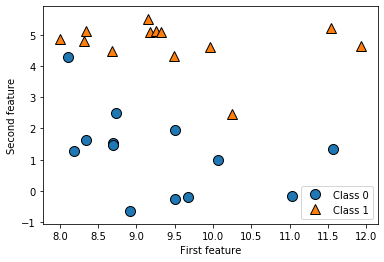

In [2]:
#以下がクラス分類に使用するデータセット

import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

#データセットの作成
X,y=mglearn.datasets.make_forge()
print('X:',X[0:5])
print('y:',y[0:5])

#データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y) #[:,0]は1列目を表す,[:,1]は2列目
plt.legend(["Class 0","Class 1"],loc=4) #4は右下
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

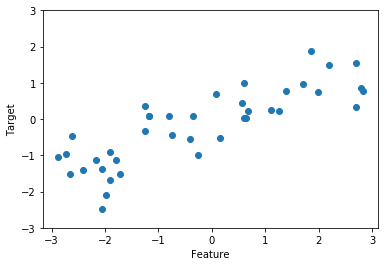

In [3]:
#回帰に使用するデータセットは以下
X,y=mglearn.datasets.make_wave(n_samples=40) #40点をプロット
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
#実世界のクラス分類用データセット
#sklearnのデータセットは多くがbunchクラスで、dictionaryのようにふるまうが、
#bunch.keyで値を取り出せる

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys())) 

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Shape of cancer data :{}".format(cancer.data.shape)) #30の特徴量を持つ569のデータ

print("cancer.data:\n",cancer.data[0:2])
print("cancer.target_names:\n",cancer.target_names[0:2])
print("cancer.target:\n",cancer.target[0:10])

Shape of cancer data :(569, 30)
cancer.data:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
cancer.target_names:
 ['malignant' 'benign']
cancer.target:
 [0 0 0 0 0 0 0 0 0 0]


In [6]:
import numpy as np

print(np.bincount(cancer.target)) #0が何回、1が何回出てくるかをカウントする

print("Sample counts per class:\n{}".format(
{n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})) #zipは両方の値を同時に取得したい時に使用
                                                                          #n,vがzipにアクセスし、n:vを値として返す

[212 357]
Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
#実世界の回帰用データセット

from sklearn.datasets import load_boston
boston=load_boston()
print("Data shape:{}".format(boston.data.shape))

#特徴量同士の積（交互作用）も見る。
#このように導出された特徴量を含めることを特徴量エンジニアリングという。

X,y=mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape)) #13の特徴量だったものが104まで増える

Data shape:(506, 13)
X.shape:(506, 104)


### 2.3.2 k-近傍法
#### 2.3.2.1 k-近傍法によるクラス分類

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


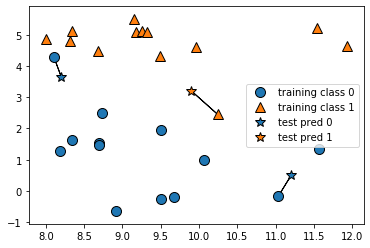

In [9]:
#k=1の場合一番近いもののクラスに分類される

mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


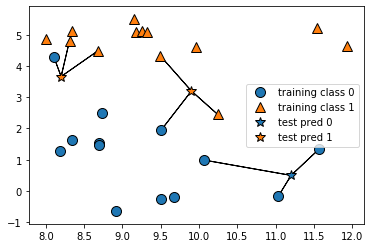

In [10]:
#k=3の場合多数派のクラスに分類される
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
#実装 forgeデータセットを使用

from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) #データの分離

from sklearn.neighbors import KNeighborsClassifier #クラスのインポート
clf=KNeighborsClassifier(n_neighbors=3) #インスタンス生成

clf.fit(X_train,y_train) #訓練

print("Test set predictions: {}".format(clf.predict(X_test))) #テスト

print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy:0.86


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


#### 2.3.2.2 KNeighbors Classifierの解析

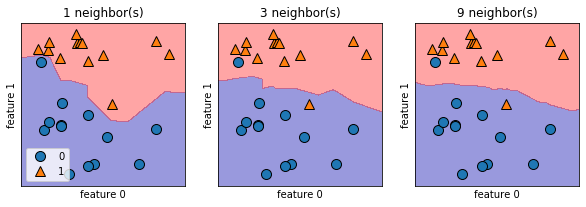

In [12]:
#n_neighbors=1の時がモデルが複雑すぎる状態

import mglearn
fig, axes=plt.subplots(1,3,figsize=(10,3)) #1エリアで3つのグラフを作成
                                           #axesがサブグラフの意味


for n_neighbors,ax in zip([1,3,9],axes): #n_neighbors=1の時、axes=1とする
    #fitメソッドは自分自身を返すので1行で
    #インスタンスを生成してfitすることができる。
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) #学習
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4) #plot_2d_separator:境界を作画
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) #discrete_scatter:点をプロット
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3) #loc=3が左下

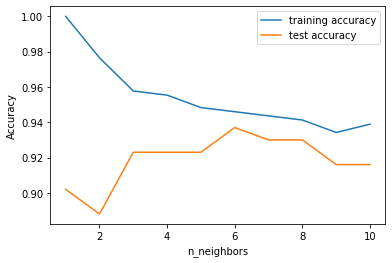

In [13]:
#実世界データでの凡化性能のテスト

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #クラスのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

cancer=load_breast_cancer() #cancerデータ読み込み
X_train, X_test, y_train, y_test= train_test_split( 
cancer.data, cancer.target, stratify=cancer.target, random_state=66) #データ分割

training_accuracy=[] #訓練の精度
test_accuracy=[] #テストの精度

#n_neighborsを1から10まで試す
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    #モデルを構築
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    #凡化性能を記録
    test_accuracy.append(clf.score(X_test,y_test))
        
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 2.3.2.3 k-近傍回帰

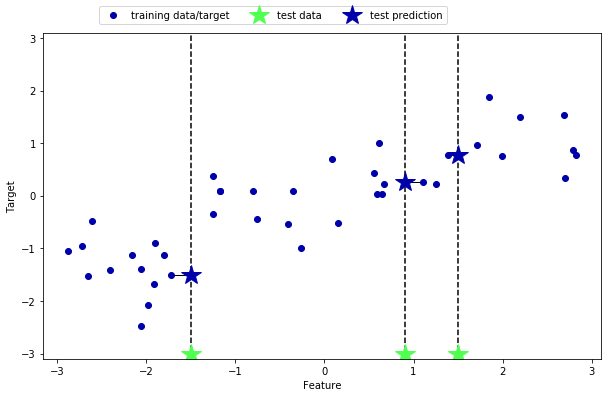

In [14]:
#k=1の場合

mglearn.plots.plot_knn_regression(n_neighbors=1)

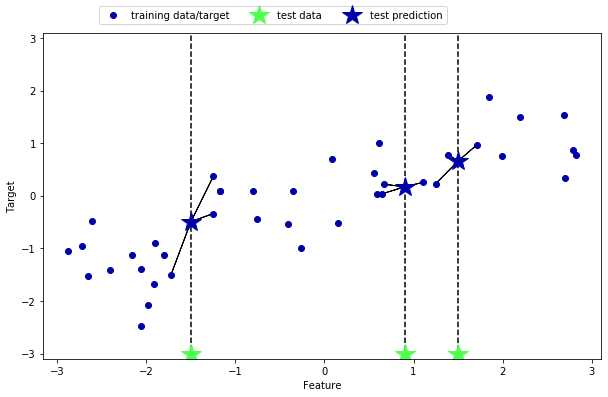

In [15]:
#k=3の場合

mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40) 

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0) #データを分割

reg=KNeighborsRegressor(n_neighbors=3) #モデルのインスタンスを作成
reg.fit(X_train,y_train) #モデルを学習させる

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [17]:
print("Test set prediction:\n{}".format(reg.predict(X_test))) #予測結果

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [18]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test))) #R^2は決定係数、0-1までの値をとる

Test set R^2: 0.83


#### 2.3.2.4 KNeighborsRegressorの解析

(1000,)
(1000, 1)


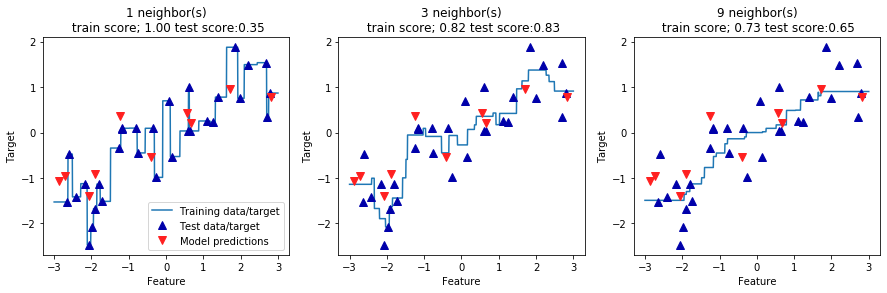

In [19]:
import mglearn

fig,axes=plt.subplots(1,3,figsize=(15,4))

#-3～3の配列を作成
line=np.linspace(-3,3,1000)
print(line.shape)
line=line.reshape(-1,1) #-1は任意の数値になる
print(line.shape)

for n_neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score; {:.2f} test score:{:.2f}".format(
    n_neighbors,reg.score(X_train,y_train),
    reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend({"Model predictions","Training data/target",
                "Test data/target"},loc="best")

#### 2.3.2.5 利点と欠点とパラメータ

In [20]:
#利点：モデルの理解のしやすさ
#欠点：処理速度が遅く、多数の特徴量を扱えない
#パラメータ：近接点の数、距離速度（デフォルトはユークリッド距離）

### 2.3.3 線形モデル
#### 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


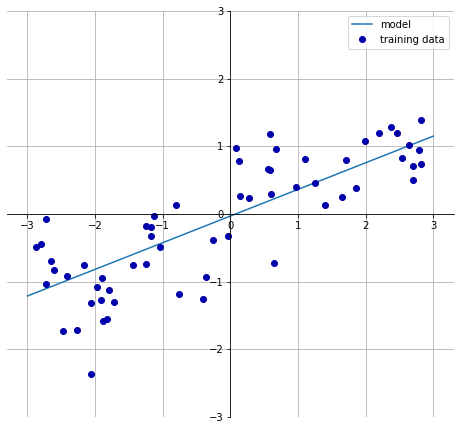

In [21]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰（通常最小二乗法）：Ordinary least squares

In [22]:
#y=wx+bにおいて
#予測と真のターゲットyとの平均二乗誤差(Mean squared error)が最小になるようにwとbを求める

from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

In [23]:
#w=coefficient:係数
#b=intercept:切片

print('lr.coef_:{}'.format(lr.coef_)) #訓練データから得られた属性には最後に_がつく
print('lr.intercept_{}:'.format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_-0.031804343026759746:


In [24]:
#訓練セットとテストセットのスコア近く、両方とも悪いのは適合不足を意味する
#次元が上がっていくと線形モデルはより強力になるので、過剰適合の可能性が高くなる
#⇒次元が二つになると直線ではなく平面になり、よりフィットしやすくなる

print("Training set score : {:.2f}".format(lr.score(X_train,y_train))) #決定係数R^2
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score : 0.67
Test set score: 0.66


In [25]:
#複雑なデータで線形回帰を行う
#訓練セットとテストセットで差があるので過剰適合が発生している

X,y=mglearn.datasets.load_extended_boston()
print(X.shape) #506データに対して、特徴量が104個ある
print(y.shape)

(506, 104)
(506,)


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

lr=LinearRegression().fit(X_train,y_train)
print("Training set score : {:.2f}".format(lr.score(X_train,y_train))) #決定係数R^2
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score : 0.95
Test set score: 0.61


#### 2.3.3.3 リッジ回帰

In [27]:
#式は最小二乗法と同じだが、係数の絶対値の大きさを可能な限り小さくする
#つまり傾きをなるべく小さくしたいという制約条件がある

#正則化(regularization):過剰適合を防ぐためモデルを制約すること
#リッジ回帰の正則化はL2正則化と呼ばれる
#L2ノルム（wのユークリッド長に対してペナルティをかける）

from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.752768


In [28]:
#リッジ回帰ではモデルの簡潔さ（0に近い係数の数）と訓練セットに対する性能がトレードオフになる
#alphaパラメータで調整可能

ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.635941


In [29]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.772207


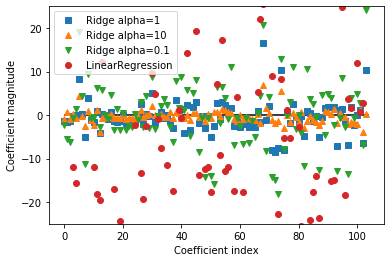

In [30]:
#係数の比較

plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

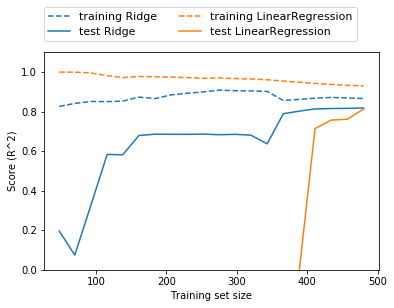

In [31]:
#横軸が学習データの数
#学習データが増えると、線形モデルはリッジ回帰に追いつく
#訓練データはリッジ回帰が常に悪くなる
#線形モデルの訓練データは徐々に悪くなる（データが増えると、過剰適合が難しくなる）

mglearn.plots.plot_ridge_n_samples()

#### 2.3.3.4 Lasso

In [32]:
#Lassoも係数が0になるように制約をかけるが、L1正則化と呼ばれる
#係数ベクトルのL1ノルム、係数の絶対値の和にペナルティをかける
#いくつかの係数が0になる⇒モデルを説明しやすい

from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used : {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used : 4


In [33]:
#適合不足が起こっているので、alphaを小さくする
#この時max_iter(最大繰り返し回数)を増やす必要がある

lasso01=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test,y_test)))
print("Number of features used : {}".format(np.sum(lasso01.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used : 33


In [34]:
#さらにalphaを減らすと過剰適合が起こる

lasso0001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test,y_test)))
print("Number of features used : {}".format(np.sum(lasso0001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used : 96


Text(0, 0.5, 'Coefficient magnitude')

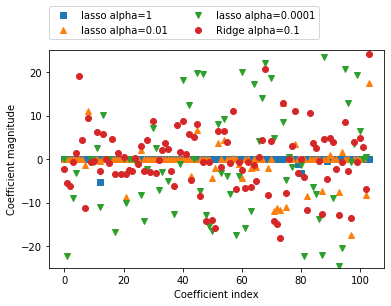

In [35]:
#図示すると以下
#lasso alpha=0.01, Ridge alpha=0.1が同じぐらいの性能を示すが、Ridgeの係数は0になっていない

plt.plot(lasso.coef_,'s',label="lasso alpha=1")
plt.plot(lasso01.coef_,'^',label="lasso alpha=0.01")
plt.plot(lasso0001.coef_,'v',label="lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [36]:
#まずはRidge回帰を試すといい
#特徴量の重要なものがわずかしかない、もしくは解釈しやすいモデルが欲しいならlassoを使う
#LassoとRidgeのペナルティを組み合わせたElasticNetクラスがあり、実用上はこの組み合わせが最良の結果をもたらすが、
#L1,L2正則化の2つのパラメータを調整しなければならない

#### 2.3.3.5 クラス分類のための線形モデル

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


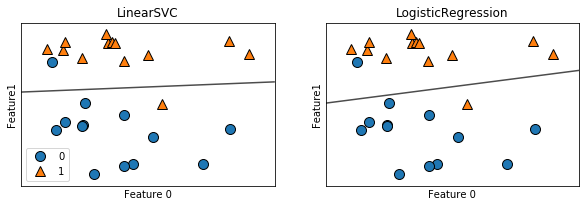

In [37]:
#2つのクラスを直線、平面、超平面で分割する⇒決定境界が入力の線形関数になる
#ロジスティック回帰と線形サポートベクターマシンは最も一般的なクラス分類器

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                   ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature1")
axes[0].legend()

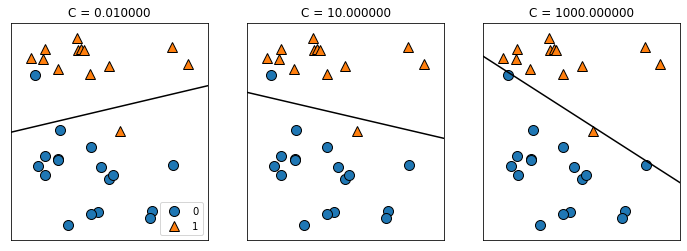

In [38]:
#Ridgeと同様L2で正則化を行っている
#正則化の強度を決定するパラメータはCと呼ばれる
#Cが大きくなると正則化が弱くなる

#C=0.01だと、正則化が強く、係数が0（水平）に近くなる
#Cが大きくなると、傾きを増やしてでも正確に分類しようとする

mglearn.plots.plot_linear_svc_regularization()

In [39]:
#実際にロジスティック回帰を使用
#TrainとTestが近いので適合不足の可能性がある

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42) #stratifyに均等に分割したいデータを入れる
logreg=LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.955
Test set score: 0.958


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
#正則化を弱くして、適合不足を解消

logreg100=LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
#正則化を強くすると、性能は悪化する

logreg001=LogisticRegression(C=0.001).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Training set score: 0.923
Test set score: 0.937


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


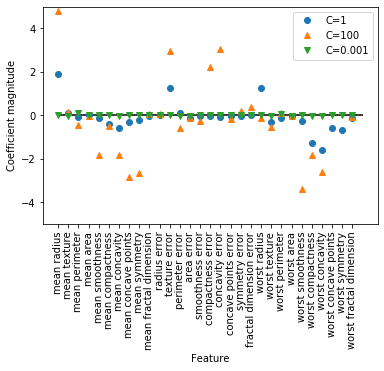

In [42]:
#3番目のパラメータはC=0.001とC=100で正負が逆転する
#良性、悪性とどのようにこの特徴量が関係するかを考えながらパラメータを決定する

plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001: 0.92


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=1.000:0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000:0.99
Test accuracy of l1 logreg with C=100.000: 0.98


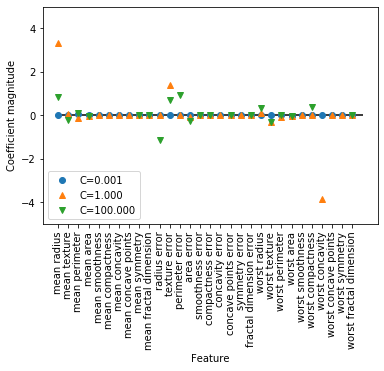

In [43]:
#より解釈しやすいモデルが欲しいならL1正則化を使う

for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1').fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)

#### 2.3.3.6 線形モデルによる多クラス分類

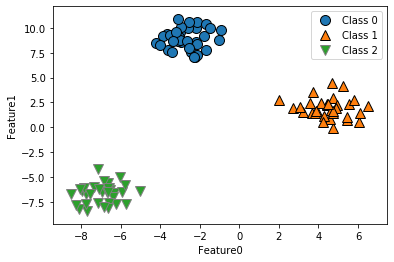

In [44]:
#各クラスをガウス分布でサンプリングした2次元データセットを使う
import mglearn
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")
plt.legend(["Class 0","Class 1","Class 2"])

In [45]:
linear_svm=LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape) #各クラスに対する係数ベクトルを格納
print("Intercept shape: ", linear_svm.intercept_.shape) #各クラスに対する切片を格納

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


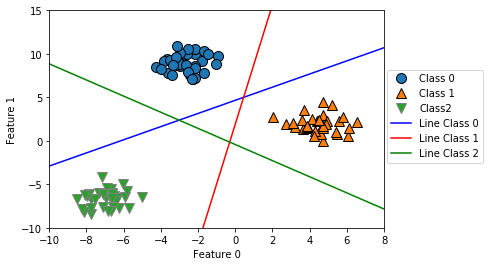

In [46]:
#多クラス分類は1つのクラスと他のデータを分類する

mglearn.discrete_scatter(X[:,0],X[:,1],y) #散布図を描画
line=np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_,linear_svm.intercept_,['b','r','g']): #直線を描画
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color) #w0x0+w1x1+b=0 よりx1=-(w0x0+n+b)/w1
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class2','Line Class 0','Line Class 1','Line Class 2'],loc=(1.01,0.3))

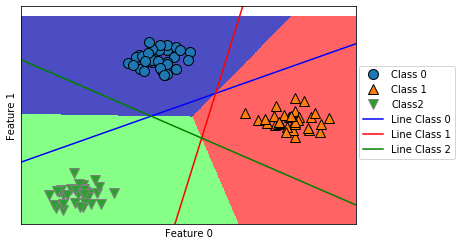

In [47]:
#クラス分類式の値が一番大きいクラス＝その点に最も近い線を持つクラスに分類される
#※クラス分類値が大きいほど領域の線のプラス側にあるということになる

mglearn.plots.plot_2d_classification(linear_svm,X,fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y) #散布図を描画
line=np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_,linear_svm.intercept_,['b','r','g']): #直線を描画
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color) #w0x0+w1x1+b=0 よりx1=-(w0x0+n+b)/w1
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class2','Line Class 0','Line Class 1','Line Class 2'],loc=(1.01,0.3))

#### 2.3.3.7 利点、欠点、パラメータ


In [48]:
#決めなければならないのは、C,alphaの正則化パラメータとL1,L2のどちらの正則化を使用するか
#Cやalphaは通常対数スケールで値を調整する
#基本的にはL2を使用、モデルの解釈のしやすさや、一部の特徴量だけが重要であるならL1を使用する
#線形モデルはデータ数よりも特徴量が多い時に力を発揮する

### 2.3.4 ナイーブベイズクラス分類器

In [49]:
#線形モデルに似ているが、高速
#⇒クラスに対する統計値を個々の特徴量毎に集めて、パラメータを学習するため
#汎化性能は線形モデルにわずかに劣る場合が多い
#GaussianNB: 任意の連続値のデータ
#BernoulliNB: 2値データ
#MultinomialNB; #カウントデータ

In [50]:
#NernoulliNBは個々のクラスに対して、特徴量毎に非ゼロである場合をカウントする

X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
           [1,0,1,0]])
y=np.array([0,1,0,1])

print(X[y==0]) #0のクラスの場合

[[0 1 0 1]
 [0 0 0 1]]


In [51]:
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0) #各クラスをカウントする
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [52]:
#MultinomialNBはクラス毎の平均値を考慮に入れる
#GaussianNBでは標準偏差も格納する
#MultinomialNBとBernoulliNBにはモデルの複雑さを制御するパラメータalphaがある
#⇒alphaが大きくなるとスムーズになり、モデルの複雑さは減少する
#⇒アルゴリズムの性能はalphaの値に対して比較的頑健である
#GaussianNBは高次元データに対して用いられるが、ほかの2つはテキストのような疎なデータに対して用いられる
#一般的にMultinomialNBのほうがBernoulliNBよりも若干性能が良いが、比較的多数の非ゼロ特徴量がある場合にはMultinomialNBが有効

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


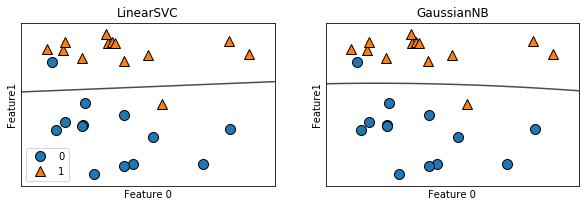

In [53]:
#本には載っていないが、使ってみたら以下のようになる

from sklearn.naive_bayes import GaussianNB

X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),GaussianNB()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                   ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature1")
axes[0].legend()

### 2.3.5 決定木
#### 2.3.5.1 決定木の構築

In [54]:
#一つのクラスしか含まない葉を純粋と呼ぶ
#データポイントの出力値はその葉の中にある訓練データポイントの平均ターゲット値となる

#### 2.3.5.2 決定木の複雑さの制御

In [55]:
#木の生成を早めに止める事前枝刈り
#木を構築した後、情報の少ないノードを削除する事後枝刈り
#scikit-learnには事前枝刈りのみ

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937063


In [56]:
#過剰適合しているため、木の深さを4で止めるよう設定

tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951049


#### 2.3.5.3 決定木の解析

In [57]:
import os
folder="C:\\Users\\nakam\\Python\\Data\\Scikit-Learn"
os.chdir(folder)

from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
               feature_names=cancer.feature_names,impurity=False, filled=True)

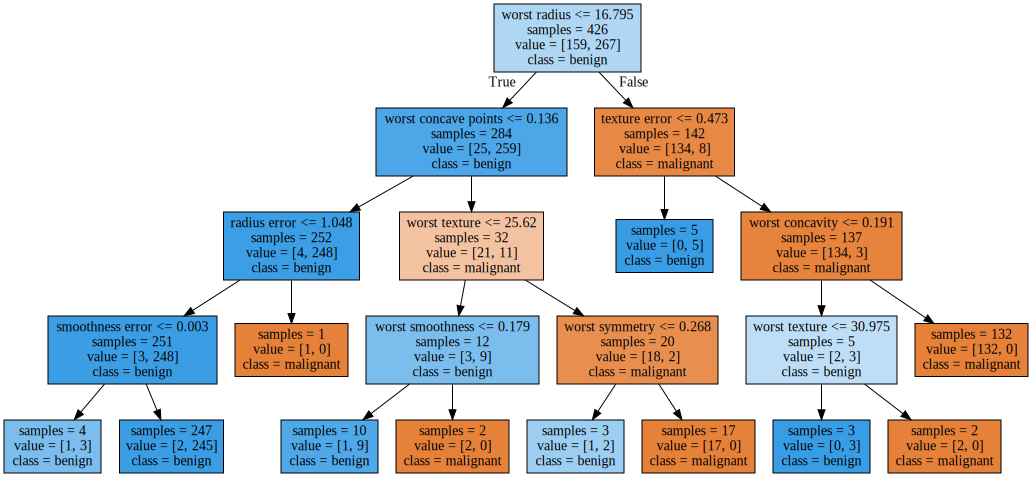

In [58]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### 2.3.5.4 決定木の特徴量の重要性

In [59]:
#特徴量の重要度(1ならば完全に予測できる、合計が1になる)

print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


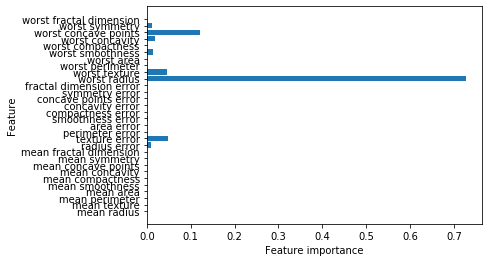

In [60]:
#グラフ化
#重要かどうかを教えてくれるだけで、どう影響するかはわからない

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1] #特徴量の数を格納
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names) #np.arangeで0-n_featuresの配列を作成する
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


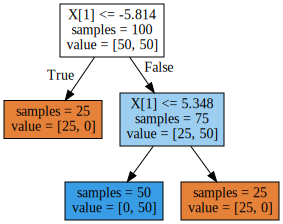

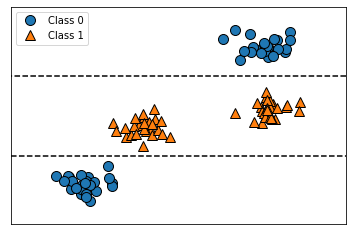

In [61]:
#以下のようにX[1]しか使わないが、複数の条件に分岐するケースがある

import mglearn

tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

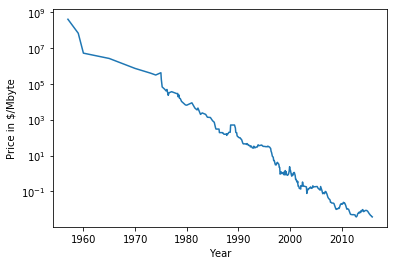

In [62]:
#回帰の場合は外挿ができない（訓練データの外側は予測不可）

import os
import pandas as pd

folder="C:\\Users\\nakam\\Python\\Data\\Scikit-Learn"
os.chdir(folder)
ram_prices=pd.read_csv("ram_price.CSV")

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

X_train=data_train.date[:,np.newaxis] #右に次元を追加する
print(data_train[:5])
print(data_train.date[:,np.newaxis][:5])
y_train=np.log(data_train.price) #対数変換

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree) #対数グラフに乗せるため、元に戻す
price_lr=np.exp(pred_lr)

   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0
[[1957.]
 [1959.]
 [1960.]
 [1965.]
 [1970.]]


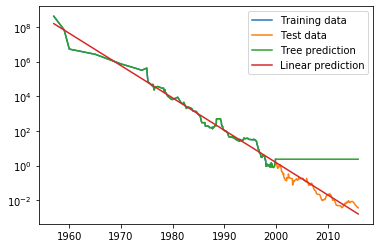

In [64]:
#決定木は訓練した範囲にないものに新しい答えを生成できない

plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend()

#### 2.3.5.5 長所、短所、パラメータ

In [65]:
#事前枝刈りはmax_depth,max_leaf_nodes,min_samples_leafのどれかを使う

#長所
#結果のモデルの理解がしやすい
#データノスケールに対して完全に不変
#⇒個々の特徴量が独立に処理される
#⇒特徴量の正規化、標準化は必要ない
#⇒2血が混ざっていても、スケールが異なっていても問題なし

#過剰適合しやすく、凡化性能が低い
#⇒ほとんどの場合は次の章のアンサンブル法が用いられる

### 2.3.6 決定木のアンサンブル法

In [66]:
#アンサンブル法：複数の機械学習モデルを組み合わせて強力なモデルを構築する方法
#ランダムフォレストと勾配ブースティング決定木がある

#### 2.3.6.1 ランダムフォレスト

In [67]:
#異なった方向に過剰適合した決定木の平均をとることで、予測性能を維持したまま、過剰適合を解決する手法
#構築する決定木の数を決めなければならない

#データに対してブートストラップサンプリングを行う
#⇒n_samples個のサンプルからn_samples個を復元抽出する

#決定木を作る際に、特徴量のサブセットをランダムに選択する
#⇒maxfeatureが大きいと過剰適合、小さいと適合しなくなる

#回帰の場合は平均値を出力
#クラス分類の場合はソフト投票戦略を用いる
#⇒それぞれの決定木が確立を出力し、すべての確率を平均し、最も確率が高いラベルが予測値になる

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2) #n_estimators:決定木の数
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

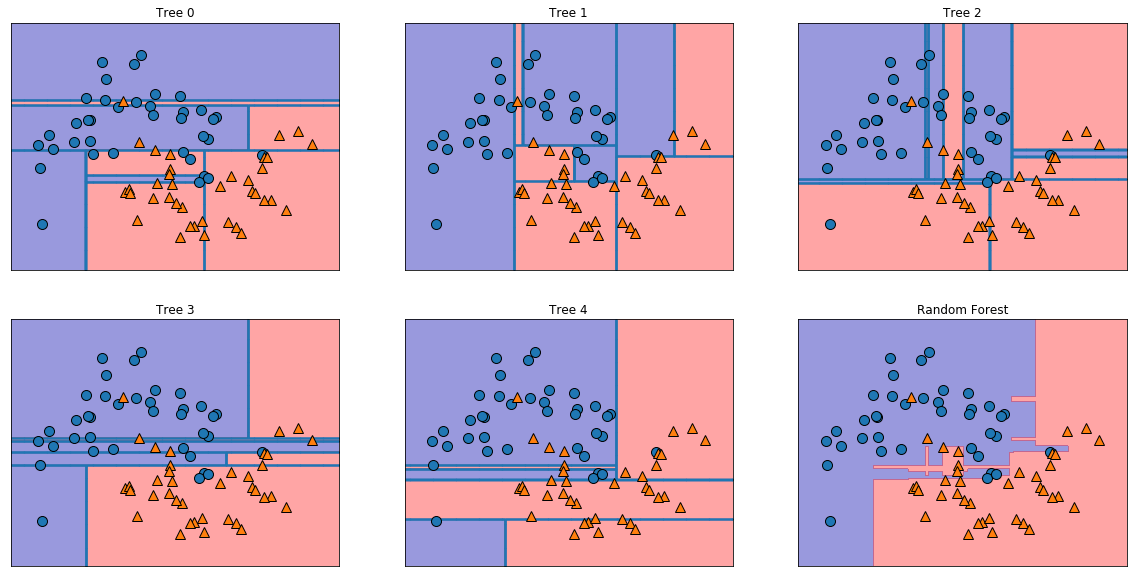

In [69]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4) #axes=最後の行、最後の列を指定
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [70]:
#Cancerデータにランダムフォレストを使用してみる
#max_featuresパラメータ等も調整可能だが、調整しなくても十分な性能が出ている

print(cancer.data.shape)

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0) #n_estimators:決定木の数
forest.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(forest.score(X_test,y_test)))

(569, 30)
Accuracy on training set: 1.000
Accuracy on test set: 0.972028


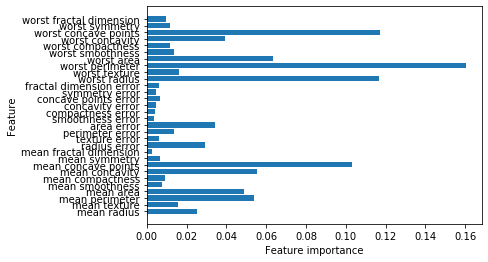

In [71]:
#グラフ化
#重要かどうかを教えてくれるだけで、どう影響するかはわからない
#一つの決定木の時より、多くの特徴量に対して0以上の重要度を与える
#ランダムフォレストは広い視野で見た全体像をとらえることができる

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1] #特徴量の数を格納
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names) #np.arangeで0-n_featuresの配列を作成する
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

In [72]:
#長所
#スケール変換が必要ない
#パラメータ調整しなくても十分な性能が出る

#短所
#速度が遅く、メモリの消費が激しい
#テキストデータなどの非常に高次元な疎なデータにはうまく機能しない

#パラメータ
#n_estimators:大きければ大きいほど良い
#max_features:一般的にはデフォルト値を使う。小さくなると過剰適合が減る
#             デフォルトはクラス分類：sqrt(n_features)、回帰：n_features
#max_depth:事前枝刈りパラメータ

#### 2.3.6.2 勾配ブースティング回帰木（勾配ブースティングマシン）

In [73]:
#1つ前の決定木の誤りを修正して、決定木を順番に作っていく
#パラメータさえ正しく設定されていれば、性能が良い
#学習率：個々の決定木がそれまでの決定木の過ちをどれぐらい強く補正しようとするかを制御するパラメータ
#⇒強くするとモデルが複雑になる
#n_estimators:決定木の数。増やすと過ちを補正する機会が増えるので、モデルが複雑になる

#デフォルトでは深さ3の決定木が100個作られ、学習率は0.1になる

from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965035


In [74]:
#おそらく過剰適合しているので、深さの最大値を制限して事前刈取りする

gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972028


In [75]:
#過剰適合を防ぐために、学習率を制限することが可能
#この場合は深さを制限したほうが性能が上がった

gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965035


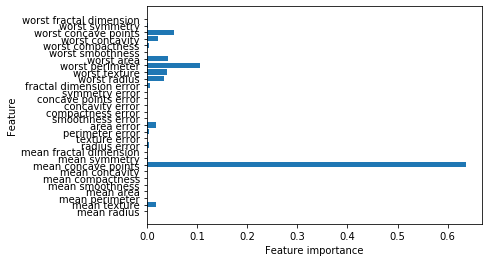

In [76]:
#グラフ化

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1] #特徴量の数を格納
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names) #np.arangeで0-n_featuresの配列を作成する
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(gbrt)

In [77]:
#長所
#性能が良い
#スケール変換不要、2値特徴量と連続値が混在していても機能する

#短所
#パラメータの調整が重要
#高次元な疎なデータに対してはうまく動かない

#n_estimatorsは大きくすると過剰学習を招く
#n_estimatorsは固定して、max_depthとlearning_rateを調整することが多い

### 2.3.7 カーネル法を用いたサポートベクタマシン

Text(0, 0.5, 'Feature 1')

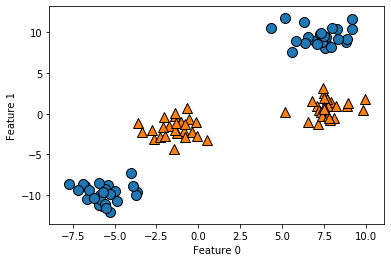

In [78]:
#線形モデルを柔軟にする方法の一つが、特徴量を追加すること
#線形モデルだと以下のようなケースに対応できない

from sklearn.datasets import make_blobs

X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

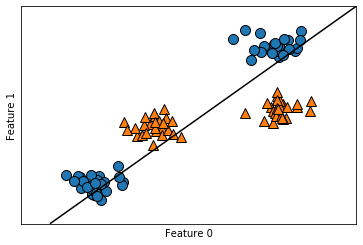

In [79]:
#線形モデルだと以下のように分離できない

from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

[-1.72161036 -3.6573384   7.0778163 ]
[-3.6573384   7.63027116 -5.27144331]


Text(0.5, 0, 'feature1**2')

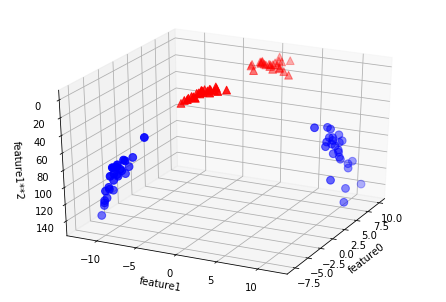

In [80]:
#ここで特徴量を追加する
#2番目の特徴量の二乗を追加

X_new=np.hstack([X,X[:,1:]**2]) #horizontal stackでふたつを結合

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

ax=Axes3D(figure,elev=-152,azim=-26) #見る角度を指定

mask=y==0 #TrueとFalseの配列がmaskに格納される
print(X_new[:,0][:3])
print(X_new[mask,0][:3]) #0列目のmaskのTrueのみが出力される

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

[-9.74064658 -9.29840934 -8.85617211]
[[-9.74064658 -9.29840934 -8.85617211]
 [-9.74064658 -9.29840934 -8.85617211]]


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1**2')

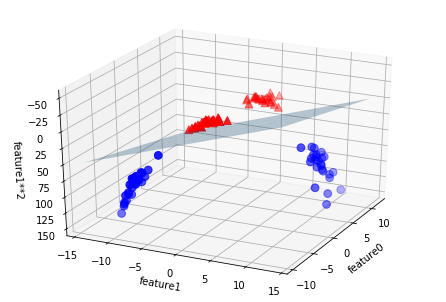

In [81]:
#上記のように3次元になると分離が可能

linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)

yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy) #格子状になる
print(xx[:3])
print(XX[:2,:3])
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2] #ax1+bx2+cx3+d=0よりcx3=ax1+bx2+d
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
          cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

Text(0, 0.5, 'Feature 1')

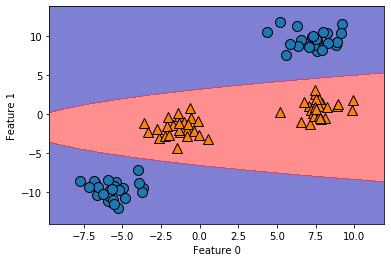

In [82]:
#元の特徴量の関数としてみると、線形SVMモデルは線形ではなくなっている

ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5) #lavelsは線を引く値を指定する
                                         #dec.reshapeで色分けする
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [83]:
#上記難しいので、式を分解すると以下

print('XX:',XX)
print('XX.ravel:',XX.ravel()) #1次元配列に変換
print('XX:',XX.shape) 
print('XX.ravel:',XX.ravel().shape)
print('np.c_:',np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()]) #axis番号が一番大きい方向で結合、1次元の場合は2次元になる
print('np.c_:',np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()].shape)
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
print('dec',dec) #決定境界からの距離が格納される
print('dec',dec.shape)
print('dec.reshape:',dec.reshape(XX.shape).shape) #配列を元に戻す

XX: [[-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]
 [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]
 [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]
 ...
 [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]
 [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]
 [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
  11.92897802]]
XX.ravel: [-9.74064658 -9.29840934 -8.85617211 ... 11.04450355 11.48674078
 11.92897802]
XX: (50, 50)
XX.ravel: (2500,)
np.c_: [[ -9.74064658 -14.11880698 199.34071046]
 [ -9.29840934 -14.11880698 199.34071046]
 [ -8.85617211 -14.11880698 199.34071046]
 ...
 [ 11.04450355  13.78064756 189.90624717]
 [ 11.48674078  13.78064756 189.90624717]
 [ 11.92897802  13.78064756 189.90624717]]
np.c_: (2500, 3)
dec [ -8.26488444  -8.21397773  -8.16307102 ... -10.72140028 -10.67049358
 -10.61958687]
dec (2500,)
d

#### 2.3.7.2 カーネルトリック

In [84]:
#多項式カーネル：特定の次数までのすべての多項式を計算
#放射基底関数カーネル(RBF):すべての次数の多項式を考えるが、次数が高くなるにつれて特徴量の重要性を小さくする

#### 2.3.7.3 SVMを理解する

In [85]:
#決定境界を決定するデータポイントをサポートベクタという
#多くの場合2つのクラスの境界に位置するごく一部の訓練データがサポートベクタとなる

Text(0, 0.5, 'Feature 1')

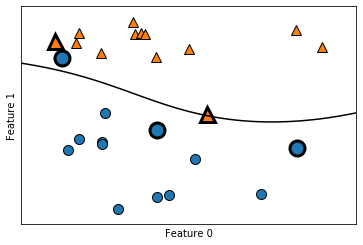

In [86]:
import mglearn
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt

X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [87]:
#上記の開設
#サポートベクタのクラスラベルはdual_coef_の正負によって決まる
print(svm.dual_coef_.ravel())
print(svm.dual_coef_.ravel()>0)
print(sv)

[-10.          -6.25178295  -3.73381586  10.           9.98559881]
[False False False  True  True]
[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


#### 2.3.7.4 SVMパラメータの調整

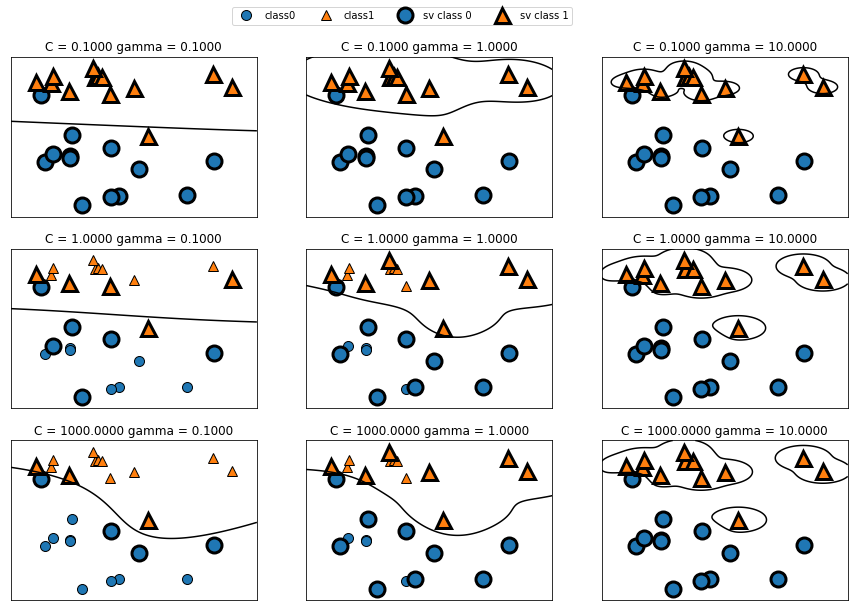

In [88]:
#gammaはカーネルの幅を表す
#⇒小さいとガウシアンカーネルの直径が大きくなり、多くの点を近いと判断する
#Cは正則化の強さを表す
#⇒大きくなると個々のデータポイントがより強い影響を持つ

fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        
axes[0,0].legend(["class0","class1","sv class 0","sv class 1"],
                  ncol=4,loc=(.9,1.2))

In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svc=SVC()
svc.fit(X_train,y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(426, 30)


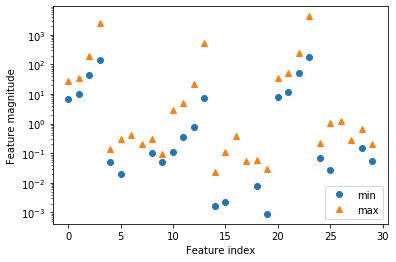

In [90]:
#カーネル法を用いたSVMでは特徴量のサイズの違いが破壊的な影響をもたらす

print(X_train.shape) #30個の特徴量がある
plt.plot(X_train.min(axis=0),'o',label='min') #縦方向にminを計算する
plt.plot(X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log") #対数スケール

#### 2.3.7.5 SVMのためのデータの前処理

In [91]:
#訓練セットの特徴量毎に最小値を計算
min_on_training=X_train.min(axis=0)
#訓練セットの特徴量毎にレンジ(最大-最小)を計算
range_on_training=(X_train-min_on_training).max(axis=0)

#最小値を引いてレンジで割る
#個々の特徴量はmin=0,max=1
X_train_scaled=(X_train-min_on_training)/range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [92]:
#テストセットも訓練セットと同じ返還を行う
X_test_scaled=(X_test-min_on_training)/range_on_training

In [93]:
svc=SVC()
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [94]:
#100%から遠く、適合不足であるため、さらにパラメータを調整する

svc=SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 2.3.7.6 利点、欠点、パラメータ

In [95]:
#利点
#データにわずかな特徴量しかなくても、複雑な決定境界を作成可能

#欠点
#サンプル数が100000ぐらいになると、メモリ使用量の面で難しくなる
#注意深く前処理とパラメータ調整が必要
#ある予測がされた理由を理解することが難しい

### 2.3.8 ニューラルネットワーク（ディープラーニング）
#### 2.3.8.1 ニューラルネットワークモデル

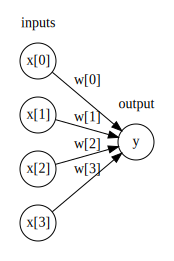

In [96]:
#MLP: Multilayer perceptron(多層パーセプトロン)
#線形回帰を図示すると以下のようになる

display(mglearn.plots.plot_logistic_regression_graph())

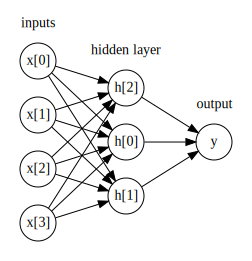

In [97]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

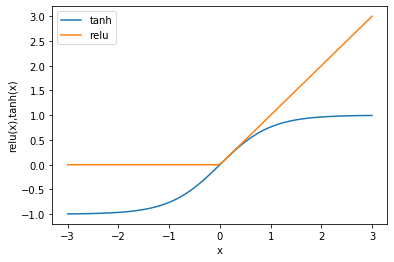

In [98]:
#relu:正規化線形関数(rectified linear unit)⇒0以下を切り捨て
#tanh:双極正接関数(hyperbolic tangent)⇒小さいものと、大きいものが-1と1に飽和

import numpy as np
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')

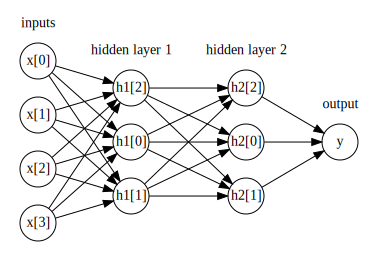

In [99]:
#層を増やしたり、ノードを増やすことができる
mglearn.plots.plot_two_hidden_layer_graph()

#### 2.3.8.2 ニューラルネットワークのチューニング

Text(0, 0.5, 'Feature 1')

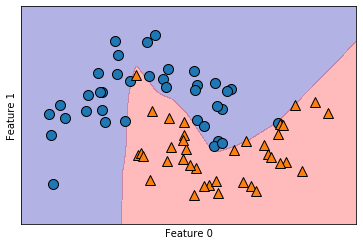

In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

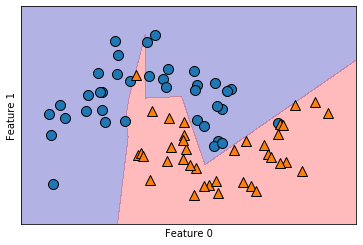

In [101]:
#reluを使っているので隠れユニットが10の場合は10本の線で境界が区切られる

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train) #隠れユニットを100⇒10に減らす
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

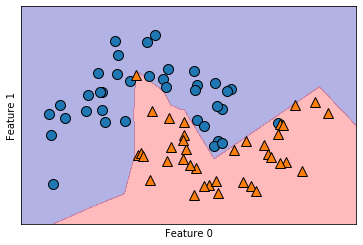

In [102]:
#隠れ層を2層にする
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train) #隠れユニット10×2とする
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

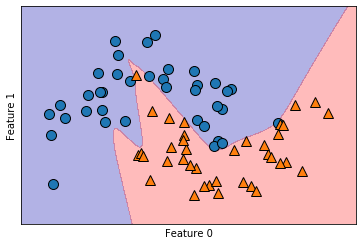

In [103]:
#活性化関数にtanhを使用するとより滑らかになる
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],activation='tanh').fit(X_train,y_train) #隠れユニット10×2とする
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

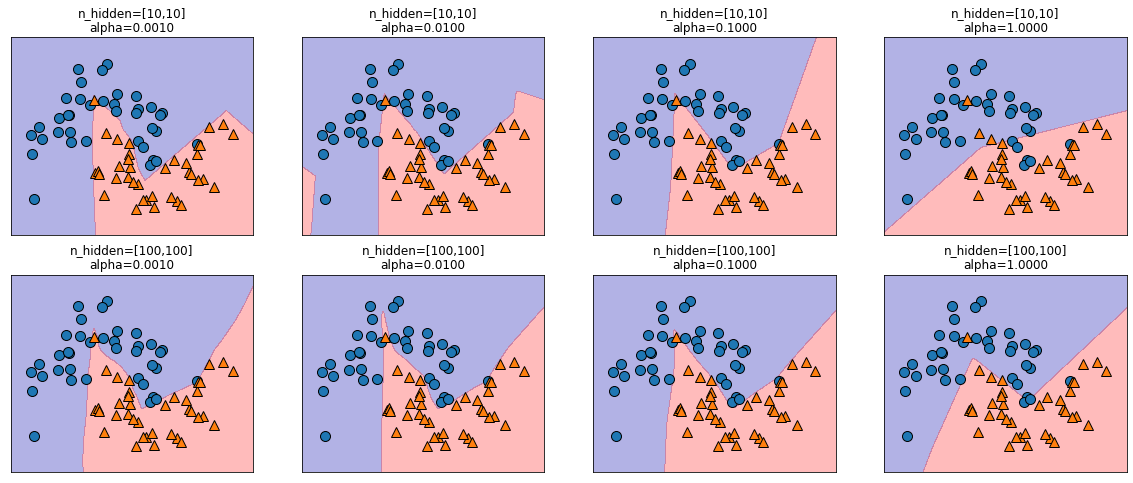

In [104]:
#リッジ回帰と同様にl2ペナルティで複雑さを制御できる
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,
                          hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                          alpha=alpha)
        
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(
        n_hidden_nodes,n_hidden_nodes,alpha))

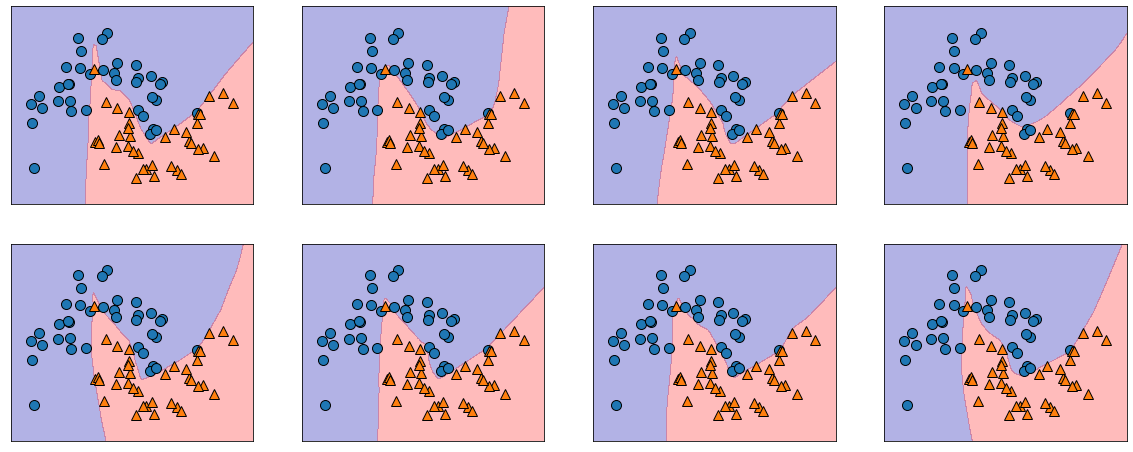

In [105]:
#初期の重みを与える乱数が変化したら、以下のように変化する
#小さいネットワークでは乱数の影響が大きい

fig,axes=plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,
                     hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [106]:
#実データに使用してみる
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [107]:
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training set: 0.939
Accuracy on test set: 0.916


In [108]:
#平均0、分散1が好ましいのでスケール変換を実施する

mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

#平均を引き、標準偏差の逆数でスケール変換
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.965


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [109]:
#学習繰り返しの回数が最大値に達したと警告が出ているので、計算回数を増やす
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [110]:
#テストと訓練に差があるので、モデルの複雑さを下げれば凡化性能が上がる可能性がある
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


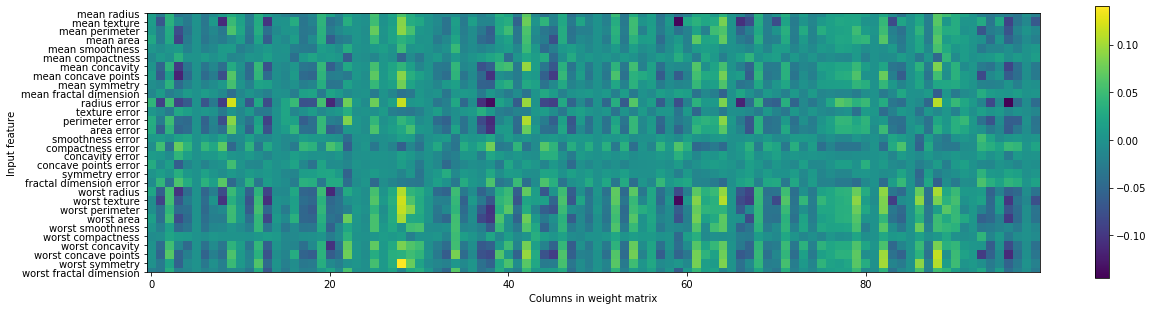

In [111]:
#学習結果を表示
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names) #特徴量が30個ある
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### 2.3.8.3 長所、短所、パラメータ

In [112]:
#回帰にはMLPRegressorを使用する
#長所：複雑なモデルを構築でき、性能が高い
#短所：前処理が必要
#      訓練に時間がかかる
#調整：隠れ層のノード数は入力層と同じぐらいにすることが多い
#      まずは過剰適合させ、ネットワークを小さくするか、alphaを増やして凡化性能を向上させていく
#      'adam'はよく機能するが、スケールに敏感
#      'lbfgs'は頑健だが、訓練に時間がかかる
#      'sgd'は高度だが、多くの設定パラメータがあり難しい

## 2.4 クラス分類器の不確実性推定
### 2.4.1 決定関数(Decision Function)

In [113]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import sklearn

X,y=make_circles(noise=0.25,factor=0.5,random_state=1)

y_named=np.array(['blue','red'])[y] #クラスに名前を付ける

X_train,X_test,y_train_named,y_test_named,y_train,y_test=\
train_test_split(X,y_named,y,random_state=0)

#学習
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [114]:
print('X_test.shape; {}'.format(X_test.shape))
print('Decision function shape: {}'.format(
gbrt.decision_function(X_test).shape))

X_test.shape; (25, 2)
Decision function shape: (25,)


In [115]:
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6])) #初めの6個を表示

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [116]:
#決定関数がマイナスならばblue、プラスならredとなる
print('Thresholded decision function:\n{}'.format(
gbrt.decision_function(X_test)>0))

print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [117]:
#True/Falseを0/1にする
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)

#predは上記Predictionsと同じとなる
pred=gbrt.classes_[greater_zero] #ClassesにはClass名が入る

print('pred is equal to predictions: {}'.format(
np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions: True


In [118]:
#decision_functionのレンジは決まっておらず、データとモデルパラメータに依存する
decision_function=gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum: {:2f}'.format(
np.min(decision_function),np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.289867


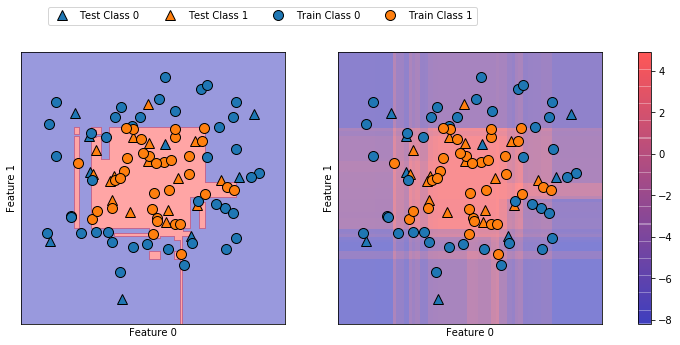

In [119]:
import matplotlib.pyplot as plt
import mglearn

fig,axes=plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(
gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(
gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,
                            markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,
                            markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test Class 0','Test Class 1','Train Class 0','Train Class 1'],
                ncol=4,loc=(.1,1.1))    

### 2.4.2 確率の予測

In [120]:
#Predict_probaはdecisin_functionよりもわかりやすく、合計が常に1になる
#出力される確信度が、実際の正答率と一致している場合、較正されているという

print("Shape of Probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of Probabilities: (25, 2)


In [121]:
print("Predicted probabilities:\n{}".format(
gbrt.predict_proba(X_test[:6]))) #はじめだけ表示

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


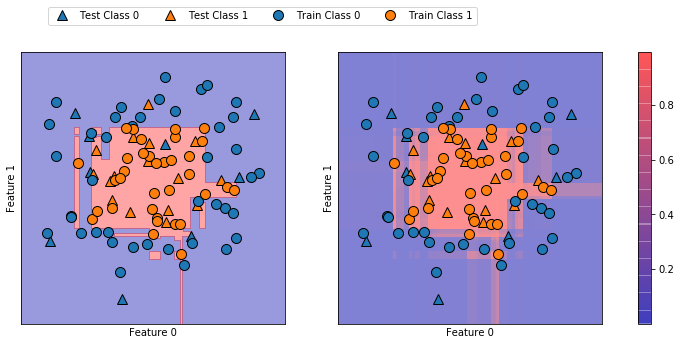

In [122]:
fig,axes=plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(
gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(
gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,
                            markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,
                            markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test Class 0','Test Class 1','Train Class 0','Train Class 1'],
                ncol=4,loc=(.1,1.1))    

### 2.4.3 多クラス分類の不確実性

In [123]:
from sklearn.datasets import load_iris

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(
iris.data,iris.target,random_state=42)

gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [124]:
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

Decision function shape: (38, 3)


In [125]:
#大きいほどそのクラスの確率が高い
print('Decision function;\n{}'.format(gbrt.decision_function(X_test)[:6,:]))

Decision function;
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [126]:
print('Argmax of decision function:\n{}'.format(
np.argmax(gbrt.decision_function(X_test),axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test))) #確信度の高いものと一致する

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [128]:
#predict_probaも同様
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test)[:6]))
print('Sums:{}'.format(gbrt.predict_proba(X_test)[:6].sum(axis=1))) #各行の和が1になる

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums:[1. 1. 1. 1. 1. 1.]


In [129]:
print('Argmax of decision function:\n{}'.format(
np.argmax(gbrt.predict_proba(X_test),axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test))) #確信度の高いものと一致する

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [130]:
#クラスが文字列の場合に、predictを再現するには、以下のようにclasses_を使って名前を付ける

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

#irisデータセットのクラス名を表示する
named_target=iris.target_names[y_train] #y_trainにtarget_namesのクラス名がつく
logreg.fit(X_train,named_target)

print('unique classes in training data: {}'.format(logreg.classes_))
print('predictions: {}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func=np.argmax(logreg.decision_function(X_test),axis=1)
print('argmax of decision function: {}'.format(argmax_dec_func[:10]))
print('argmax combined with classes_: {}'.format(
logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nakam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 2.5 まとめと展望

In [131]:
#最近傍法；小さいデータに関してはよいベースラインとなる。説明が容易。
#線形モデル：最初に試してみるべきアルゴリズム。非常に大きいデータセットに適する。
#            非常に高次元のデータに適する
#ナイーブベイズ：クラス分類にしか使えない。線形モデルよりも高速。
#                非常に大きいデータセット、高次元データに適する。線形モデルよりも精度が劣ることが多い。
#決定木：非常に高速。データのスケールを考慮する必要がない。可視化が可能で説明しやすい。
#ランダムフォレスト：ほとんどの場合単一の決定木よりも高速で、頑健で協力。データのスケールの考慮不要。
#                    高次元の疎なデータには適さない。
#勾配ブースティング決定木：多くの場合ランダムフォレストよりも少し精度が高い。ランダムフォレストよりも訓練に
#                           時間がかかるが、予測はこちらのほうが強く、メモリ使用量も小さい。
#                           ランダムフォレストよりもパラメータに敏感。
#サポートベクタマシン：同じような意味を持つ特徴量からなる中規模なデータセットに対して協力。
#                      データのスケールの調整要。パラメータに敏感。
#ニューラルネットワーク：非常に複雑なモデルを構築できる。特に大きなデータセットに有効。
#                        データのスケールを調整する必要がある。パラメータに敏感。大きいモデルは訓練に時間がかかる。